Found model '3D_demo' for 'StarDist3D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.707933, nms_thresh=0.3.
(60, 760, 669)


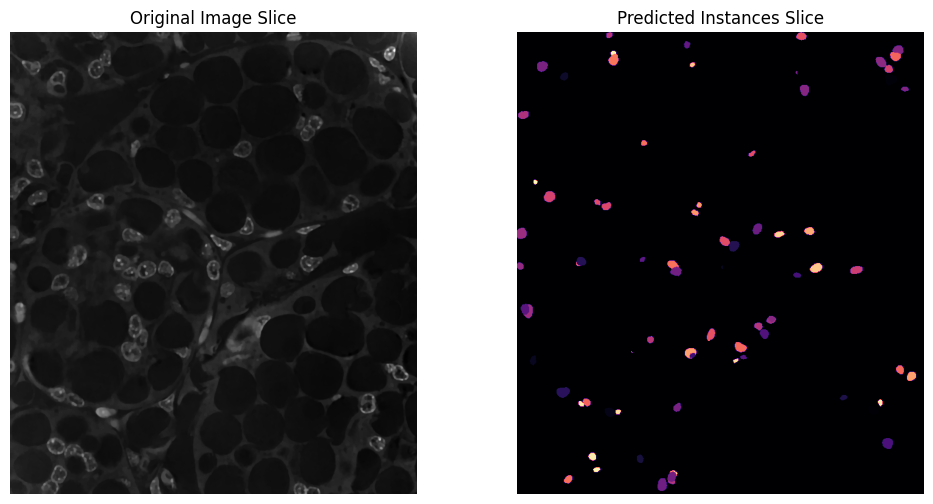

Final Image saved to stardist3D.tif


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from stardist.models import StarDist3D
from skimage.io import imread
from skimage import img_as_float
import tifffile as tiff

# Load a pre-trained StarDist3D model
model = StarDist3D.from_pretrained('3D_demo')

# Load your 3D image data (assuming the data is in a 3D TIFF file)
image_path = r"C:\Users\colin\Downloads\Test3D.tif"
image = imread(image_path)
# Print the shape of the image to verify it's OK
print(image.shape)

image = img_as_float(image)  # Convert to float if necessary

# Set the thresholds
# prob_thresh: The probability threshold for accepting a predicted object. A lower value makes the model more 
# sensitive, potentially detecting more objects but also increasing false positives.
# nms_thresh: The non-maximum suppression threshold for suppressing overlapping objects. 
# A lower value makes the model more strict about overlapping detections, potentially reducing the number 
# of false positives but also missing closely packed objects.

prob_thresh = 0.6  # Example probability threshold
nms_thresh = 0.3   # Example non-maximum suppression threshold

# Predict instances in the 3D image with custom thresholds
labels, details = model.predict_instances(image, prob_thresh=prob_thresh, nms_thresh=nms_thresh)


# Predict instances in the 3D image
# labels, details = model.predict_instances(image)

# Visualize the results
# Here we visualize a middle slice of the 3D volume
mid_slice = image.shape[0] // 2

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image[mid_slice], cmap='gray')
plt.title('Original Image Slice')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(labels[mid_slice], cmap='magma')
plt.title('Predicted Instances Slice')
plt.axis('off')

plt.show()

# Save the labels to a 16-bit TIFF file
labels_16 = labels.astype(np.uint16)
file_path = 'stardist3D.tif'
tiff.imwrite(file_path, labels_16)

print(f"Final Image saved to {file_path}")